<a href="https://colab.research.google.com/github/Sair-Shaikh/dali_challenge/blob/main/data_exploration.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Data:


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv("Sample - Superstore.csv", encoding_errors="ignore")

In [ ]:
data.columns

Index(['Unnamed: 0', 'Row ID', 'Order ID', 'Order Date', 'Ship Date',
       'Ship Mode', 'Customer ID', 'Customer Name', 'Segment', 'Country',
       'City', 'State', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

The columns roughly fall into 5 categories: Shipping `[Order Date, Ship Date, Ship Mode]`, Customer Info `[Customer ID, Customer Name, Segment]`, Geographical Data `[Country, City, State, Postal Code, Region]`, Product `[Product ID, Category, Sub-Category, Product Name]`, and Sales Data `[Sales, Quantity, Discount, Profit]`.



In [ ]:
data.head(10)

,Unnamed: 0,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,0,1.0,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,1,NaN,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,2,3.0,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,3,4.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,4,5.0,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164
5,5,6.0,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,NaN,...,90032.0,NaN,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7.0,0.0,14.1694
6,6,7.0,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,NaN,United States,...,90032.0,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4.0,0.0,1.9656
7,7,8.0,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,TEC-PH-10002275,Technology,NaN,NaN,907.1520,6.0,0.2,90.7152
8,8,9.0,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3.0,0.2,5.7825
9,9,10.0,CA-2014-115812,6/9/2014,6/14/2014,NaN,BH-11710,Brosina Hoffman,Consumer,United States,...,90032.0,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5.0,0.0,34.4700


First, I check if "Row ID" is the same as the first, indexing column. 

In [ ]:
(data["Unnamed: 0"] - data["Row ID"]).describe()

count    8995.0
mean       -1.0
std         0.0
min        -1.0
25%        -1.0
50%        -1.0
75%        -1.0
max        -1.0
dtype: float64

The columns contain the same data. Since RowID has missing data, I use the index column to fill this in, and then drop the index column.

In [ ]:
data["Row ID"] = data["Unnamed: 0"] + 1
data = data.drop(columns=["Unnamed: 0"])

In [ ]:
data.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,NaN,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,NaN,2.0,0.0,41.9136
1,2,NaN,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420.0,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3.0,0.0,219.5820
2,3,NaN,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036.0,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2.0,0.0,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,NaN,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311.0,South,NaN,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5.0,NaN,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,NaN,Consumer,United States,Fort Lauderdale,...,33311.0,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2.0,0.2,2.5164


# Exploratory Work:

**Shipping Details:**

In [ ]:
shipping_columns = ["Order Date", "Ship Date", "Ship Mode"]
data["Order Date"] = pd.to_datetime(data["Order Date"])
data["Ship Date"] = pd.to_datetime(data["Ship Date"])
data[shipping_columns].sample(10)

,Order Date,Ship Date,Ship Mode
5025,2017-07-29,2017-08-03,Standard Class
5932,2017-07-07,2017-07-09,First Class
1906,2016-05-17,2016-05-21,Standard Class
1875,2016-03-10,2016-03-16,NaN
7296,NaT,2014-05-05,NaN
3791,2015-02-27,2015-02-28,First Class
4395,2014-07-20,2014-07-20,Same Day
4982,2014-11-16,2014-11-22,Standard Class
8442,2016-03-06,NaT,Standard Class
950,2017-11-28,2017-12-02,Standard Class


In [ ]:
data["Ship Mode"].describe()

count               8995
unique                 4
top       Standard Class
freq                5357
Name: Ship Mode, dtype: object

<Axes: xlabel='Ship Mode', ylabel='count'>

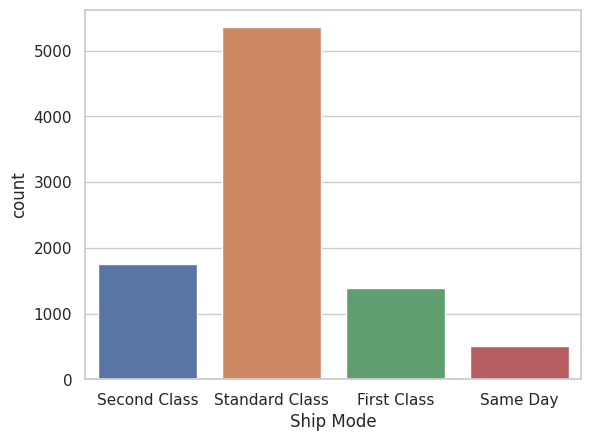

In [ ]:
sns.set_theme(style="whitegrid")
sns.countplot(x=data["Ship Mode"])

Cross-tabulate `Ship Mode` and Customer `Segment` and perform Chi^2 test to find correlation. Checking to see if particular segments tend to prefer a shipping mode.



<Axes: xlabel='Segment', ylabel='Count'>

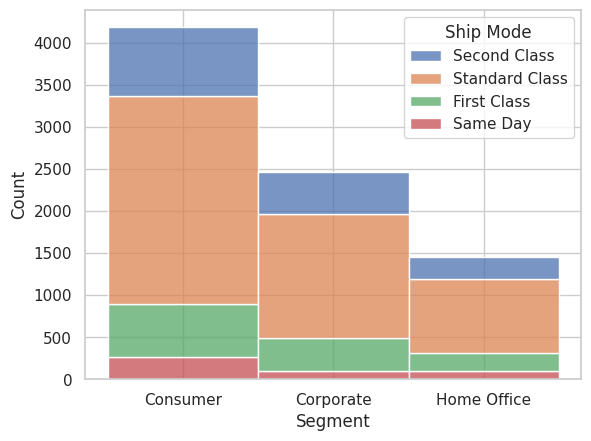

In [ ]:
shipmode_segment = pd.crosstab(index=data['Ship Mode'],columns=data['Segment'])
sns.histplot(data=data, x="Segment", hue="Ship Mode", multiple="stack")

In [ ]:
from scipy.stats import chi2_contingency
chi2 = chi2_contingency(shipmode_segment)
print("The P-value of the Chi^2 test is: ", chi2[1])

The P-value of the Chi^2 test is:  0.0012431807628944182


Converting to numeric values to find correlations:

In [ ]:
data["Segment #"], _ = pd.factorize(data["Segment"])
data["Ship Mode #"], _ = pd.factorize(data["Ship Mode"])

Now, we consider shipping time:

In [ ]:
data["Shipping Time"] = (data["Ship Date"] - data["Order Date"])
data["Shipping Time"].describe()

count                         8109
mean     3 days 23:06:00.932297447
std      1 days 17:53:35.443146201
min                0 days 00:00:00
25%                3 days 00:00:00
50%                4 days 00:00:00
75%                5 days 00:00:00
max                7 days 00:00:00
Name: Shipping Time, dtype: object

Since Shipping Time has takes only 8 values, we can treat it as a categorical variable.

<Axes: xlabel='Shipping Time', ylabel='count'>

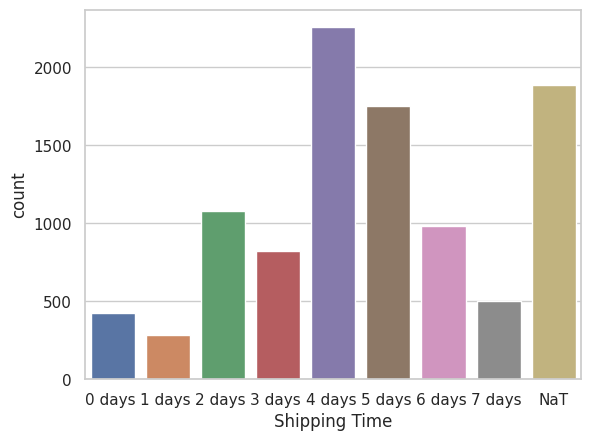

In [ ]:
data["Shipping Time"] = data["Shipping Time"].apply(lambda x: str(x)[:7]).astype("category")
sns.countplot(x=data["Shipping Time"])

Compare Shipping Time with Ship Mode:

<Axes: xlabel='Shipping Time', ylabel='Count'>

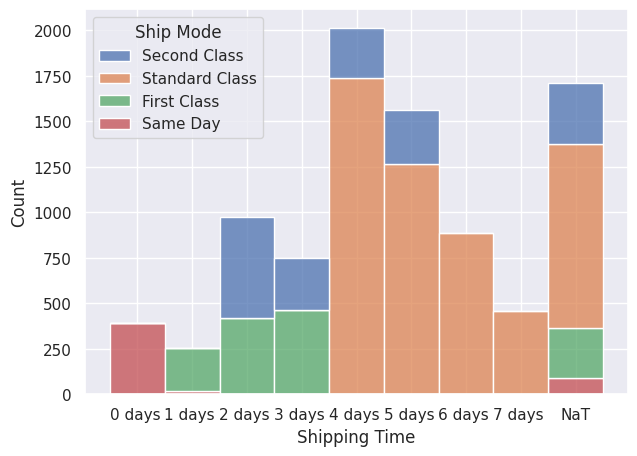

In [ ]:
sns.set(rc={'figure.figsize':(7,5)})

sns.histplot(data=data, x="Shipping Time", hue="Ship Mode", multiple="stack")

The results are reasonable and expected.

**Geographical Data**

In [ ]:
geo_columns = ["Country", "City", "State", "Postal Code", "Region"]
data[geo_columns]

,Country,City,State,Postal Code,Region
0,United States,Henderson,Kentucky,42420.0,South
1,United States,Henderson,NaN,42420.0,South
2,United States,Los Angeles,California,90036.0,West
3,United States,Fort Lauderdale,Florida,33311.0,South
4,United States,Fort Lauderdale,Florida,33311.0,South
...,...,...,...,...,...
9989,United States,Miami,NaN,NaN,South
9990,United States,Costa Mesa,California,92627.0,West
9991,United States,Costa Mesa,California,92627.0,West
9992,United States,NaN,California,92627.0,West


First, we check the international distribution of the orders. 

In [ ]:
data["Country"].describe()

count              8995
unique                1
top       United States
freq               8995
Name: Country, dtype: object

Orders are only from the US, so that column has no content of interest for analysis.

<Axes: xlabel='Region', ylabel='Count'>

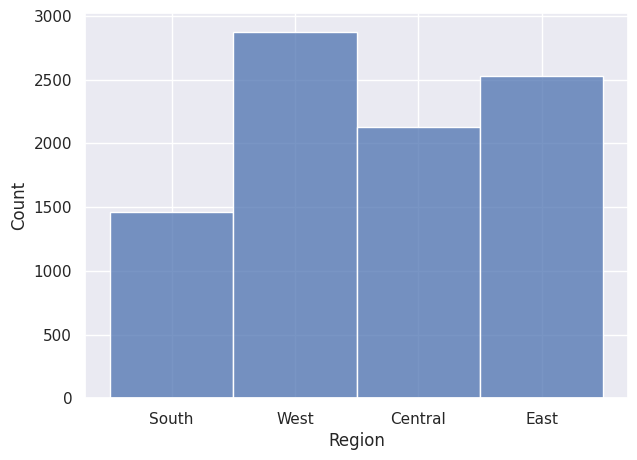

In [ ]:
sns.histplot(data, x="Region")

The distribution is not heavily skewed.

In [ ]:
data["State"].describe()

count           8995
unique            49
top       California
freq            1799
Name: State, dtype: object

<Axes: xlabel='Count', ylabel='State'>

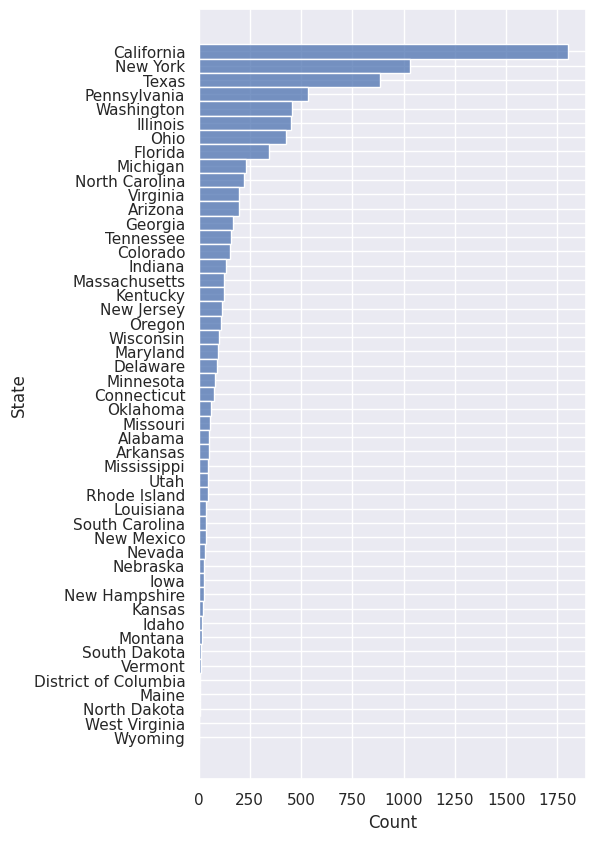

In [ ]:
states_ordered = list(data["State"].value_counts().sort_values(ascending=False).index)
data["State"] = pd.Categorical(data["State"], states_ordered)
sns.set(rc={'figure.figsize':(5,10)})
sns.histplot(data=data, y="State")

This distribution can yield interesting results, I will compare it to a few other variables in a bit. But before that, let's check the cities and postal code columns. My guess is that there wouldn't be enough data in each category within those columns to be predictive. 

In [ ]:
data["Postal Code"] = pd.Categorical(data["Postal Code"])
data["Postal Code"].describe()

count      8995.0
unique      627.0
top       10035.0
freq        235.0
Name: Postal Code, dtype: float64

The most popular postal code only has 235 elements. Does not offer any obvious predictive power.

In [ ]:
data["City"].describe()

count              8995
unique              524
top       New York City
freq                819
Name: City, dtype: object

In [ ]:
data["City"].value_counts().sort_values(ascending=False)[:20].sum()

4800

Not unreasonably skewed towards big cities as the top 20 cities have less than 50% of the data.

Now, we look at the correlation between the data for States and Shipping Time. If there is a significant correlation, that can be hint towards where a new warehouse for the store might be most needed as shippings are slow. However, we will first need to check if the slow shippings are caused by Shipping Type variation across the States, which can be indicative of economic disparity.

In [ ]:
data["Shipping Time #"], _ = pd.factorize(data["Shipping Time"])
data["State #"], _ = pd.factorize(data["State"])

data[["State #", "Shipping Time #"]].corr()

,State #,Shipping Time #
State #,1.000000,0.011122
Shipping Time #,0.011122,1.000000


There is no correlation between State and Shipping time, so the orders are well distributed.

**Categories of Products:**

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment #',
       'Ship Mode #', 'Shipping Time', 'Shipping Time #', 'State #'],
      dtype='object')

In [ ]:
data["Category"].describe()

count                8995
unique                  3
top       Office Supplies
freq                 5423
Name: Category, dtype: object

There are only 3 categories, so we draw a histogram.

<Axes: xlabel='Category', ylabel='Count'>

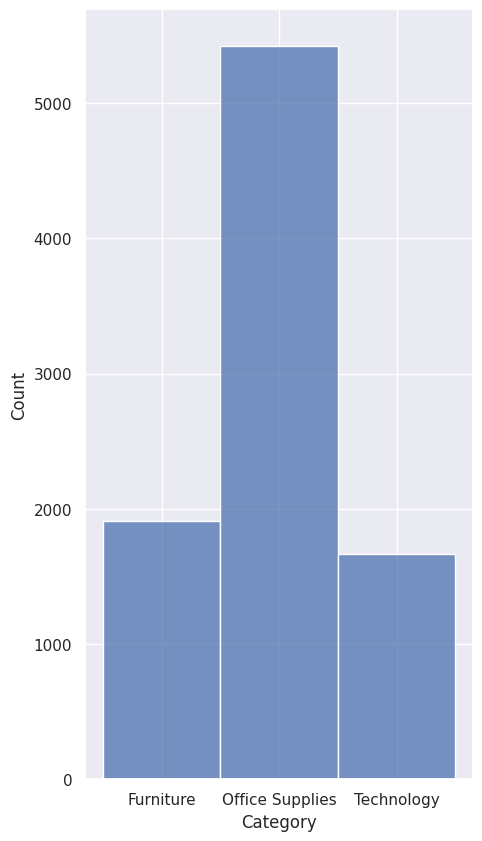

In [ ]:
sns.histplot(data, x="Category")

Office Supplies are a significantly larger proportion of orders. Next, we see the distribution for Categories and Segment. I am trying to see if a particular Segment, such as Corporate customers, make a larger proportion of orders in a particular category. 

<Axes: xlabel='Segment', ylabel='Count'>

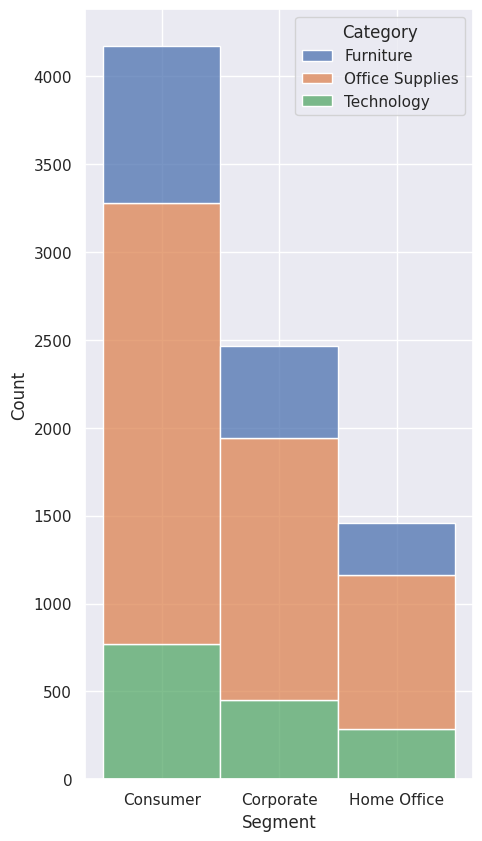

In [ ]:
sns.histplot(data, x="Segment", hue="Category", multiple="stack")

There is no visually obvious correlation. We, nevertheless, perform a numerical test. 

In [ ]:
data["Category #"], _ = pd.factorize(data["Category"])
data[["Category #", "Segment #"]].corr()

,Category #,Segment #
Category #,1.000000,0.010083
Segment #,0.010083,1.000000


As visually observed, there is no correlation.

In [ ]:
data["Sub-Category"].describe()

count        8995
unique         17
top       Binders
freq         1370
Name: Sub-Category, dtype: object

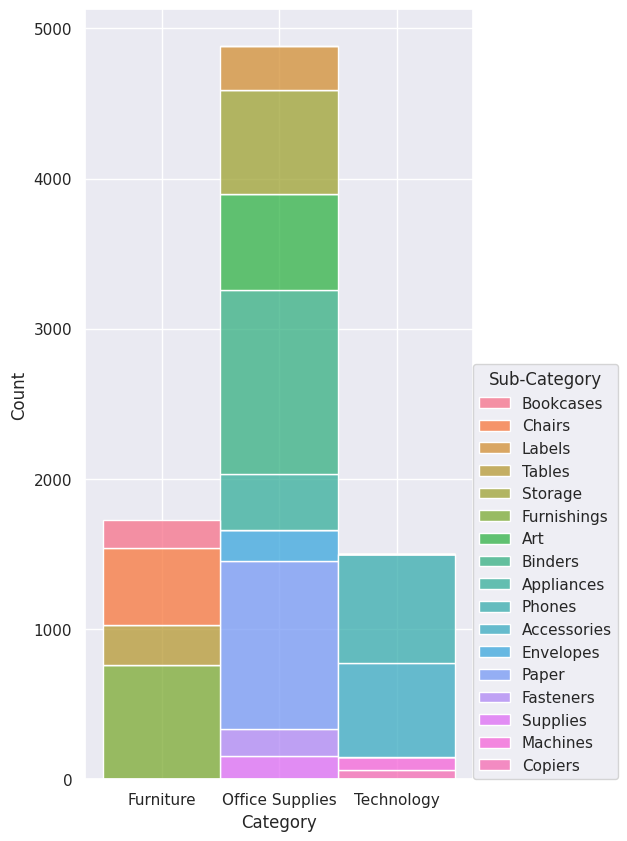

In [ ]:
plot = sns.histplot(data, x="Category", hue="Sub-Category", multiple="stack")
sns.move_legend(plot, (1, 0))

In [ ]:
data["Sub-Category #"], _ = pd.factorize(data["Sub-Category"])

**Sales Data:**

In [ ]:
sales_columns = ["Sales", "Quantity", "Discount", "Profit"]

We plot the distributions of the variables.

<Axes: xlabel='Sales', ylabel='Count'>

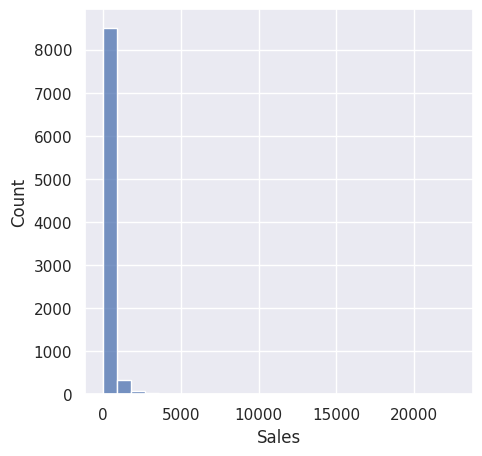

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})

sns.histplot(data, x="Sales", bins=25)

We remove outliers.


In [ ]:
sales_ub = 1.5*data["Sales"].quantile(0.75)
sales_lb = 1.5*data["Sales"].quantile(0.25)
sales_mid = data[(sales_lb < data["Sales"]) & (sales_ub > data["Sales"])]
sales_mid["Row ID"].count()

4273

<Axes: xlabel='Sales', ylabel='Count'>

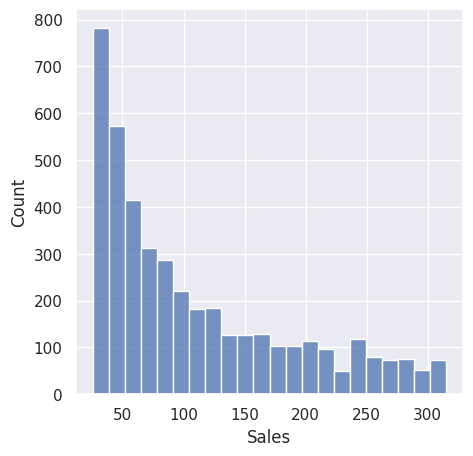

In [ ]:
sns.histplot(sales_mid, x="Sales")


Sales tend to be small in size, but frequent. This makes sense for a superstore. 

<Axes: xlabel='Quantity', ylabel='Count'>

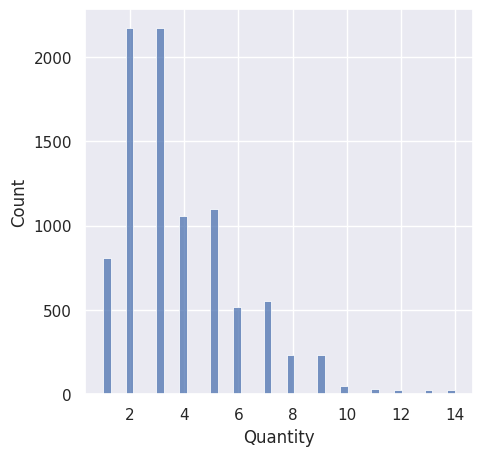

In [ ]:
sns.histplot(data, x="Quantity")

In [ ]:
data["Discount"].value_counts()

0.00    4303
0.20    3314
0.70     371
0.80     264
0.30     210
0.40     183
0.60     118
0.10      84
0.50      63
0.15      51
0.32      24
0.45      10
Name: Discount, dtype: int64

Discount looks like a categorical variable, since there are only a few values it takes. So we convert it into a categorical variable. 

In [ ]:
data["Discount Categorical"] = data["Discount"].astype("category")

<Axes: xlabel='Profit', ylabel='Count'>

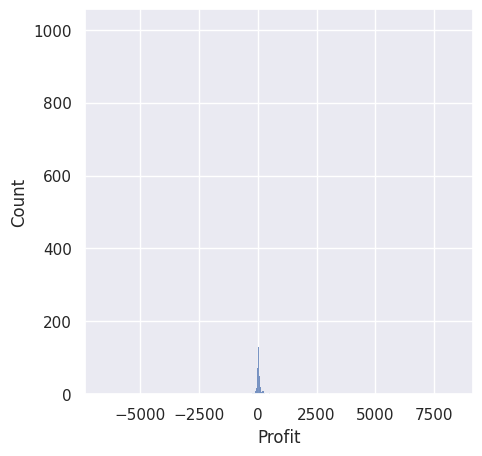

In [ ]:
sns.histplot(data, x="Profit")

We remove outliers. 

<Axes: xlabel='Profit', ylabel='Count'>

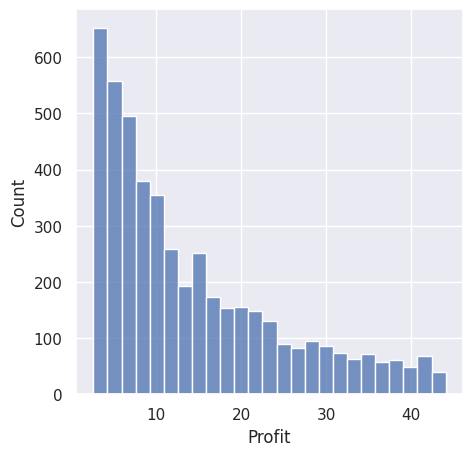

In [ ]:
profit_ub = 1.5*data["Profit"].quantile(0.75)
profit_lb = 1.5*data["Profit"].quantile(0.25)
profit_mid = data[((data["Profit"]<profit_ub) & (data["Profit"]>profit_lb))]
sns.histplot(profit_mid, x="Profit")

<Axes: xlabel='Discount', ylabel='Profit'>

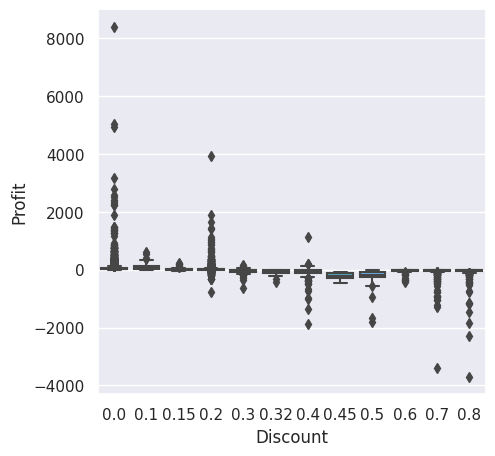

In [ ]:
sns.boxplot(data, x="Discount", y="Profit")

Interestingly, for all discount levels, the interquartile range hovers around 0. However, as the discount is increaded, the profit has increasingly more negative outliers - which implies that increasing discount leads to a loss. 

<Axes: xlabel='Discount', ylabel='Profit'>

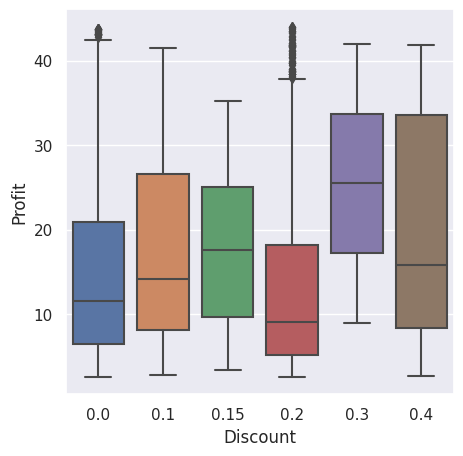

In [ ]:
sns.boxplot(profit_mid, x="Discount", y="Profit")

Thus, the median profit increases slightly at higher profit levels, barring at 20%. However, since there are a significant amount of outliers, and as seen previously, there isn't too much data for discounts besdies 0% and 20%, this isn't conclusive. 

# Correlations:

In [ ]:
corr_matrix = data.corr()
corr_matrix

<ipython-input-45-b20f780b4413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,Row ID,Sales,Quantity,Discount,Profit,Segment #,Ship Mode #,Shipping Time #,State #,Category #,Sub-Category #
Row ID,1.000000,-0.008283,-0.003843,0.017162,0.007497,0.012057,0.000722,-0.018286,-0.004987,-0.016731,0.004481
Sales,-0.008283,1.000000,0.211996,-0.029031,0.416212,0.008597,-0.005586,-0.007550,0.002368,0.025373,-0.015834
Quantity,-0.003843,0.211996,1.000000,0.004964,0.068545,-0.000727,-0.019768,-0.026621,-0.001677,-0.018583,-0.024277
Discount,0.017162,-0.029031,0.004964,1.000000,-0.230852,-0.018730,0.006712,-0.021386,-0.120342,-0.042126,-0.066029
Profit,0.007497,0.416212,0.068545,-0.230852,1.000000,0.012590,-0.002012,-0.004334,0.036554,0.063710,0.063922
Segment #,0.012057,0.008597,-0.000727,-0.018730,0.012590,1.000000,0.000370,-0.009449,0.040239,0.010083,0.004947
Ship Mode #,0.000722,-0.005586,-0.019768,0.006712,-0.002012,0.000370,1.000000,0.235222,-0.001109,0.005334,0.021946
Shipping Time #,-0.018286,-0.007550,-0.026621,-0.021386,-0.004334,-0.009449,0.235222,1.000000,0.011122,0.004269,0.004039
State #,-0.004987,0.002368,-0.001677,-0.120342,0.036554,0.040239,-0.001109,0.011122,1.000000,0.010316,0.005735
Category #,-0.016731,0.025373,-0.018583,-0.042126,0.063710,0.010083,0.005334,0.004269,0.010316,1.000000,0.323916


<Axes: >

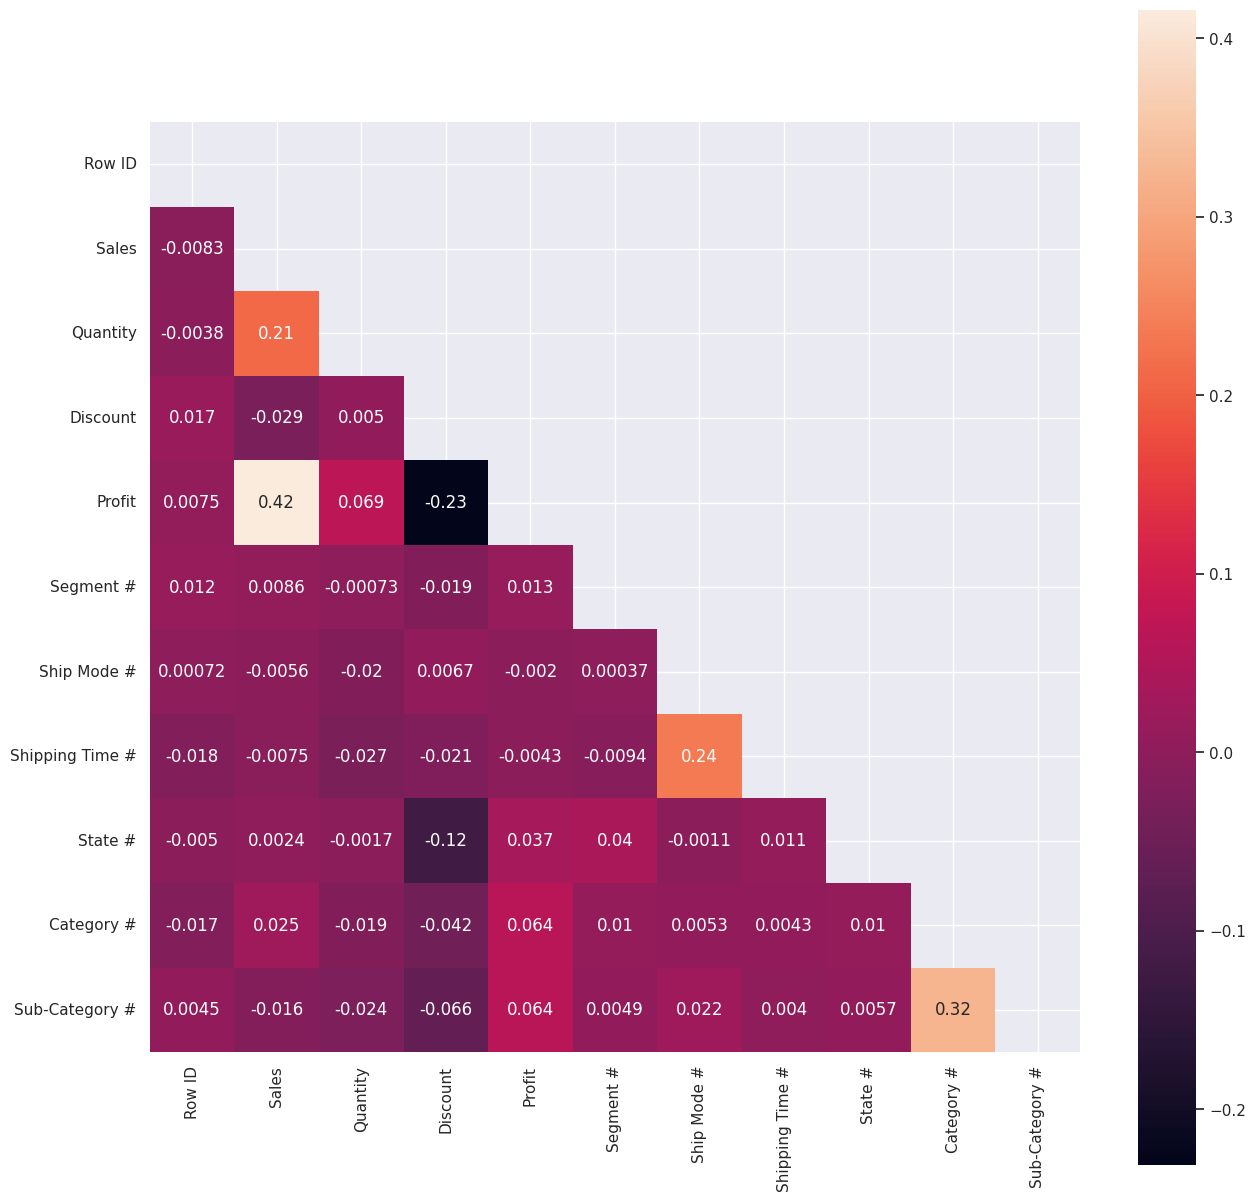

In [ ]:
sns.set(rc={'figure.figsize':(15,15)})
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, square=True, annot=True, mask=mask)

There are obvious correlations between Sales and Profit, Sales and Quantity, Ship Mode and Shipping Time, Category and Subcategory. The only non-obvious ones are between State and Discount, and Discount and Profit. However, the one between State and Discount is not very high, and states are not numbered by geographic proximity, so it is meaningless. The only meaningful conclusion is that higher discount tends to lead to lower profit.

# Clustering:

Now, we check for clustering between the numeric Sales features. 

<Axes: xlabel='Quantity', ylabel='Profit'>

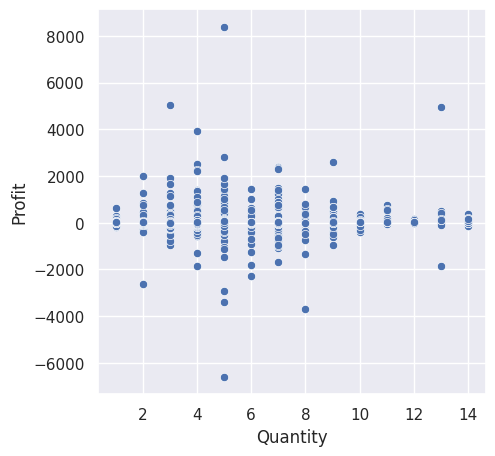

In [ ]:
sns.set(rc={'figure.figsize':(5,5)})
sns.scatterplot(data, x="Quantity", y="Profit")

<Axes: xlabel='Quantity', ylabel='Sales'>

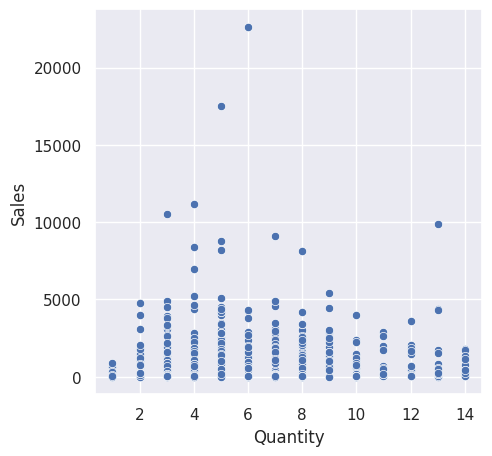

In [ ]:
sns.scatterplot(data, x="Quantity", y="Sales")

<Axes: xlabel='Sales', ylabel='Profit'>

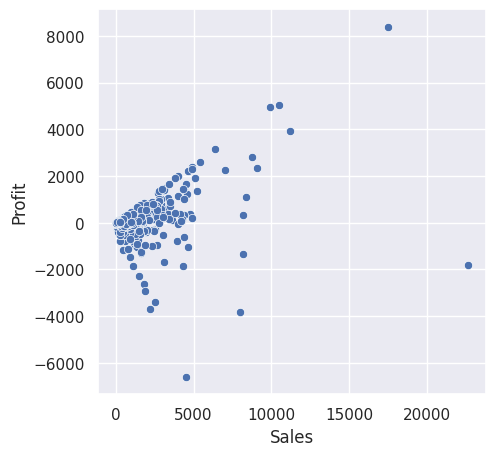

In [ ]:
sns.scatterplot(data, x="Sales", y="Profit")

This is an interesting plot. The outliers seem to be following a linear trend. 

In [ ]:
data["Profit per Sales"] = data["Profit"] / data["Sales"]
profit_sales = data[["Profit", "Sales", "Profit per Sales"]]
ub = profit_sales["Profit per Sales"].quantile(0.90)
lb = profit_sales["Profit per Sales"].quantile(0.10)
profit_sales = profit_sales[(profit_sales["Profit per Sales"] < lb) | (profit_sales["Profit per Sales"] > ub)]
profit_sales.corr()

,Profit,Sales,Profit per Sales
Profit,1.000000,0.398361,0.213930
Sales,0.398361,1.000000,0.038658
Profit per Sales,0.213930,0.038658,1.000000


There is a significant correlation between the Profit/Loss and the value of Sales for outliers. 

<Axes: xlabel='Profit per Sales', ylabel='Count'>

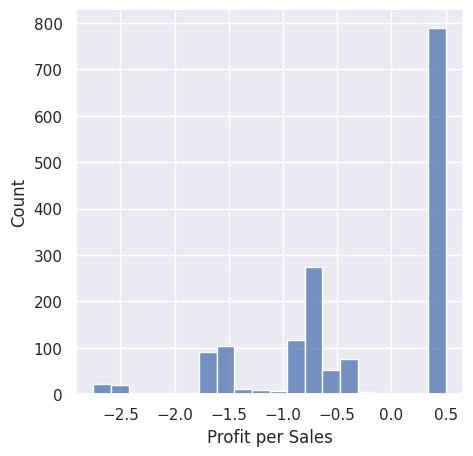

In [ ]:
sns.histplot(profit_sales, x="Profit per Sales", bins=20)

<Axes: xlabel='Sales', ylabel='Profit'>

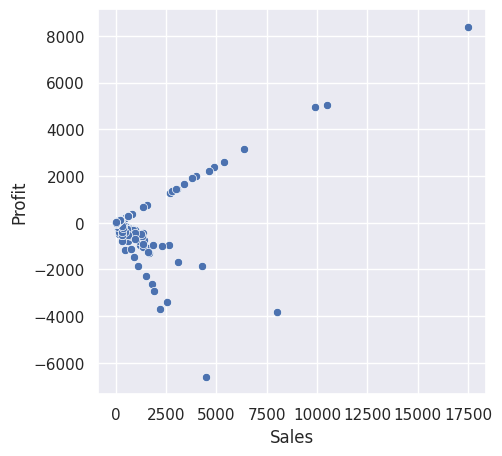

In [ ]:
sns.scatterplot(profit_sales, x="Sales", y="Profit")

Interestingly, the outliers make a straight line with slope 0.5.

In [ ]:
data.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit', 'Segment #',
       'Ship Mode #', 'Shipping Time', 'Shipping Time #', 'State #',
       'Category #', 'Sub-Category #', 'Discount Categorical',
       'Profit per Sales'],
      dtype='object')

In [ ]:
data.to_csv("superstore processed.csv")